In [40]:
import seaborn as sns

In [41]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [42]:
train_data.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [43]:
y = train_data['quality']
x = train_data.drop(['quality','Id'], axis=1)
x_test = test_data.drop('Id', axis=1)

<AxesSubplot: xlabel='fixed acidity', ylabel='Count'>

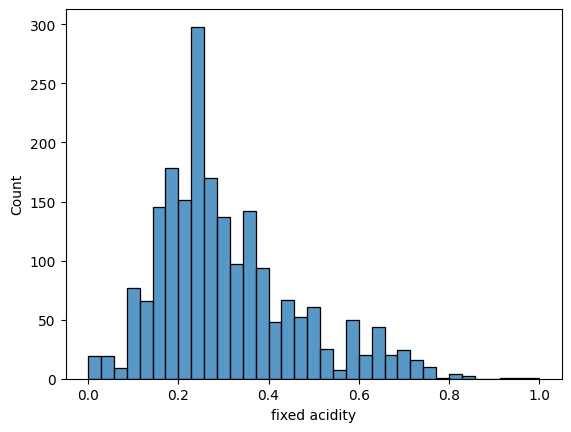

In [57]:
sns.histplot(x['fixed acidity'])

<AxesSubplot: xlabel='quality', ylabel='Count'>

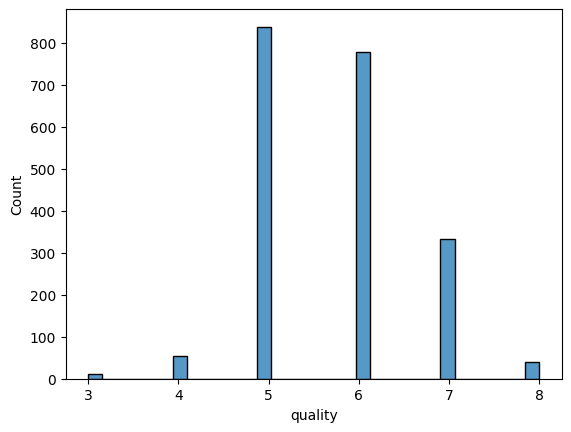

In [44]:
sns.histplot(y)

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.1,random_state=42)

In [47]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=66, activation='relu',input_shape=[11]),
    layers.Dense(units=6, activation='relu'),
    layers.Dense(units=1)
])

In [48]:
model.compile(optimizer='Adam', loss="mean_absolute_error")

In [49]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, min_delta=0.001, restore_best_weights=True)

In [50]:
history = model.fit(
    x_train,y_train,
    validation_data=(x_val,y_val),
    epochs=100,
    batch_size=200,
    callbacks=early_stopping
)

Epoch 1/100
10/10 [==============================] - 1s 32ms/step - loss: 5.5962 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 5.5215 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 5.4398 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 5.3668 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 5.2786 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 5.1965 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 5.0958 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 4.9963 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 4.8755 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 4.7506 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 15ms/ste

In [51]:
result = model.predict(x_test)

43/43 [==============================] - 0s 1ms/step


<AxesSubplot: ylabel='Count'>

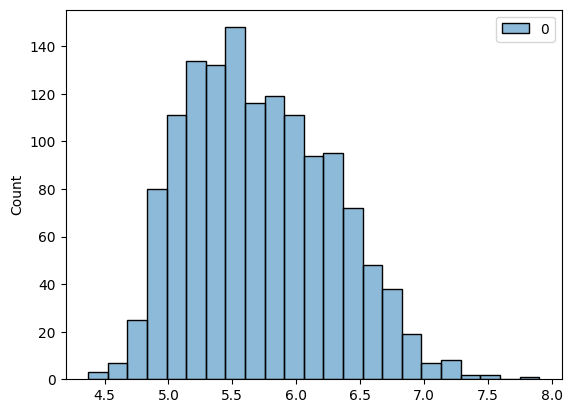

In [52]:
sns.histplot(result)

In [53]:
min(result)

array([4.3720393], dtype=float32)

In [54]:
def assign_int(num):
    if 0.5<=num<1.5: out = 1
    if 1.5<=num<2.5: out = 2
    if 2.5<=num<3.5: out = 3
    if 3.5<=num<4.5: out = 4
    if 4.5<=num<5.5: out = 5
    if 5.5<=num<6.5: out = 6
    if 6.5<=num<7.5: out = 7
    if 7.5<=num<8.5: out = 8
    if 8.5<=num<9.5: out = 9
    return out

In [55]:
new_result = []
for num in result:
    new_result.append(assign_int(num))

In [56]:
df = pd.DataFrame({'Id':test_data['Id'].values, 'quality':new_result})
df.to_csv('submission.csv', index=False)